**Exercici 1**

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia.  
Classifica els diferents registres utilitzant l'algorisme de **K-means**.  
Caldrà preparar el dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Publicacions Facebook Thailandia.csv')
print(df.shape)
df.head()

(7050, 16)


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Al observar el DataFrame, vemos que se compone de 7050 filas y 16 columnas. Contiene información sobre publicaciones de Facebook en Tailandia.  
Las columnas que contiene son:  
- **status_id**: Identificador, número  de cada una de las publicaciones.  
- **status_type**: Tipo de la publicación realizada. Texto, foto, video..  
- **status_published**: Fecha y hora de la publicación.  
- **num_reactions**: Número total de reacciones que ha recibido la publicación.  
- **num_comments**: Número total de comentarios realizados en la publicación.  
- **num_shares**: Número total de veces que se ha compartido la publicación.  
- **num_likes**: Número total de reacción 'Me gusta' en la publicación.  
- **num_loves**: Número total de reacción 'Me encanta' en la publicación.  
- **num_wows**: Número total de reacción 'Me asombra' en la publicación.  
- **num_hahas**: Número total de reacción 'Me divierte' en la publicación.  
- **num_sads**: Número total de reacción 'Me entristece' en la publicación.  
- **num_angrys**: Número total de reacción 'Me enfada' en la publicación.  


In [3]:
df.dtypes

status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

En cuanto al tipo de dato, podemos observar:  
- Objeto: 3 columnas.  
- Enteros: 9 columnas.
- Decimales: 4 columnas.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
df.duplicated().sum()

51

Ls cuatro últimas columnas (que además no tienen un nombre con sentido) parecen estar vacías y existen 51 entradas duplicadas.

In [6]:
df_2 = df.drop(['Column1', 'Column2', 'Column3','Column4'], axis = 1)
data = df_2.drop_duplicates()
print(data.shape)
data.head()

(6999, 12)


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Al eliminar los duplicados y las filas que no contienen datos, podemos ver que el DataFrame ha pasado a tener 6999 entradas y 12 columnas.

Buscando informacion en Internet, las publicaciones son de de 10 vendedores minoristas de moda y cosméticos tailandeses, por lo que parece que el primer numero del status_id debe ser el perfil de la persona que hace la publicación y el segundo número sería la publicación en sí.  
Separaremos entonces en dos columnas diferentes para tener los datos por separado.

In [7]:
data[['profile', 'post']] = data['status_id'].str.split('_', expand = True)

/var/folders/k7/pj7t376n5fdght7_xd0lf2k00000gp/T/ipykernel_92914/3874823199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['profile', 'post']] = data['status_id'].str.split('_', expand = True)
/var/folders/k7/pj7t376n5fdght7_xd0lf2k00000gp/T/ipykernel_92914/3874823199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['profile', 'post']] = data['status_id'].str.split('_', expand = True)


In [8]:
# Reordenamos las columnas y eliminamos la columna original 'status_id' al ser substituida por las dos nuevas:

data = data.reindex(columns = ['post', 'profile','status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'])
data.drop('status_id', inplace = True, axis = 1)
data.head()

,post,profile,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1649696485147474,246675545449582,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,1649426988507757,246675545449582,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,1648730588577397,246675545449582,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,1648576705259452,246675545449582,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,1645700502213739,246675545449582,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


**Variables numéricas**:

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,6999.0,224.994571,452.880746,0.0,17.0,58.0,216.0,4710.0
num_comments,6999.0,225.552079,892.743010,0.0,0.0,4.0,22.0,20990.0
num_shares,6999.0,40.258608,132.046903,0.0,0.0,0.0,4.0,3424.0
num_likes,6999.0,209.946707,439.550330,0.0,17.0,57.0,182.0,4710.0
num_loves,6999.0,12.751536,40.106872,0.0,0.0,0.0,3.0,657.0
num_wows,6999.0,1.252893,8.725551,0.0,0.0,0.0,0.0,278.0
num_hahas,6999.0,0.697957,3.970912,0.0,0.0,0.0,0.0,157.0
num_sads,6999.0,0.232605,1.481105,0.0,0.0,0.0,0.0,51.0
num_angrys,6999.0,0.110159,0.688582,0.0,0.0,0.0,0.0,31.0


La tabla muestra el número de publicaciones (6999) así como la media, la desviación típica, los cuartiles y el máximo y mínimo para cada una de las variables.  
Parece observarse también que la variable **num_reactions** es el num, total de el resto de reacciones: num_likes,  num_loves, num_wows, num_hahas, num_sads y num_angrys.  

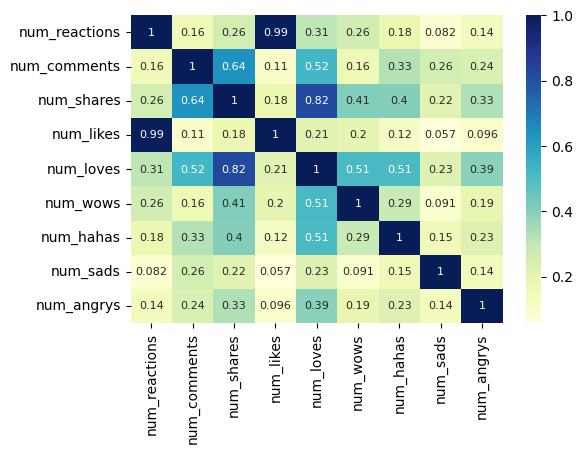

In [10]:
plt.subplots(figsize=(6,4))
sns.heatmap(data.corr(numeric_only = True),cmap = 'YlGnBu',annot = True, annot_kws = {"size": 8});

Representamos gráficamente la correlación entre las variables. A la vista del heatmap podemos ver:  
- Existe una alta correlación entre el num_likes y el num_reactions.  
- Existe una alta correlación entre el num_loves y el num_shares. 
- Existe correlación pero en menor medida entre:
    - num_shares y num_comments  
    - num_loves y num_comments  
    - num_loves y num_wows  
    - num_loves y num_hahas  


**Variables categóricas**:

In [11]:
data.describe(include = 'O').T

,count,unique,top,freq
post,6999,6997,429583263825475,2
profile,6999,9,246675545449582,2635
status_type,6999,4,photo,4244
status_published,6999,6913,12/9/2017 7:00,2


- post: podria ser una repetición pero en el filtro de debajo se puede comprobar que los valores son iguales pero están publicadas en diferentes fechas.  
- profile: Existen 9 perfiles distintos
- status_type: Existen 4 diferentes, la de mayor frecuencia es 'photo', que se repite 4244  
- status_published: Parece haber algunas publicadas al mismo momento, puesto que como hemos visto antes, no existen repeticiones. En el filtro de abajo se puede comprobar que son dos publicaciones diferentes publicadas al mismo tiempo.

In [12]:
data[data['post'] == '429583263825475']

,post,profile,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1408,429583263825475,246675545449582,photo,4/22/2014 5:43,537,16,1,537,0,0,0,0,0
1729,429583263825475,246675545449582,photo,9/11/2013 0:12,537,16,1,537,0,0,0,0,0


In [13]:
data[data['status_published'] == '12/9/2017 7:00']

,post,profile,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
5859,670416879749134,614855718638584,video,12/9/2017 7:00,85,0,0,84,1,0,0,0,0
5860,670416583082497,614855718638584,video,12/9/2017 7:00,185,519,301,134,46,0,4,1,0


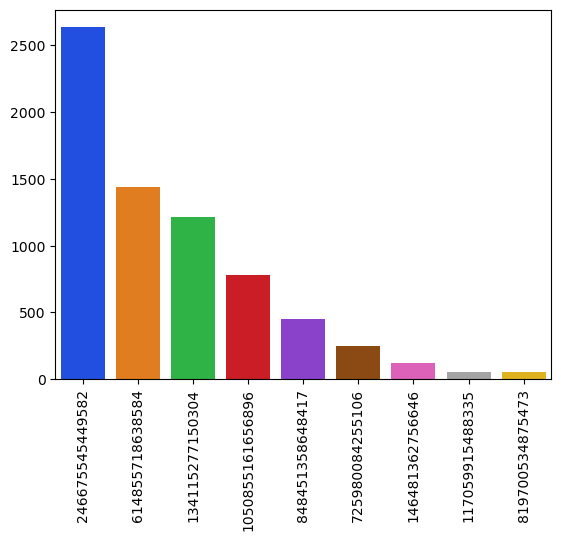

In [14]:
# Representación grafica de la cantidad de publicaciones por cada perfil.

prof_count = data['profile'].value_counts()

sns.set_palette("bright")
sns.barplot(x = prof_count.index, y = prof_count.values)
plt.xticks(rotation = 90)
plt.show()

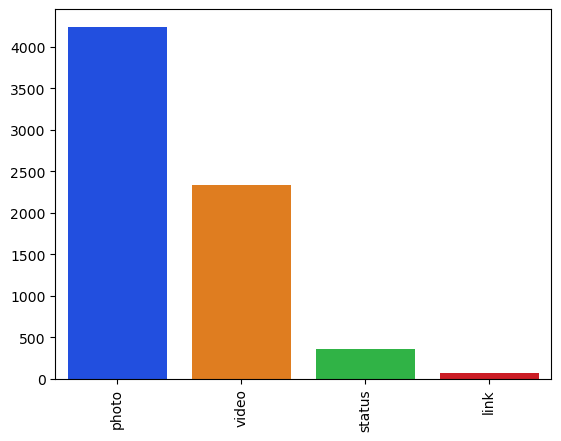

In [15]:
# Representación grafica de los tipos de publicaciones por cada perfil.

type_count = data['status_type'].value_counts()

sns.set_palette("bright")
sns.barplot(x = type_count.index, y = type_count.values)
plt.xticks(rotation = 90)
plt.show()

**Preprocesamiento Variables Numéricas**

Comprobaremos si las variables siguen una distribución Gaussiana o no, mediante la representación gráfica y el test de Saphiro.  
Para ello hemos de comprobar que el tipo de la variable sea *float* y en caso cotrario, convertirlas.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   post              6999 non-null   object
 1   profile           6999 non-null   object
 2   status_type       6999 non-null   object
 3   status_published  6999 non-null   object
 4   num_reactions     6999 non-null   int64 
 5   num_comments      6999 non-null   int64 
 6   num_shares        6999 non-null   int64 
 7   num_likes         6999 non-null   int64 
 8   num_loves         6999 non-null   int64 
 9   num_wows          6999 non-null   int64 
 10  num_hahas         6999 non-null   int64 
 11  num_sads          6999 non-null   int64 
 12  num_angrys        6999 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 765.5+ KB


In [17]:
data[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']] = data[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].astype(float)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post              6999 non-null   object 
 1   profile           6999 non-null   object 
 2   status_type       6999 non-null   object 
 3   status_published  6999 non-null   object 
 4   num_reactions     6999 non-null   float64
 5   num_comments      6999 non-null   float64
 6   num_shares        6999 non-null   float64
 7   num_likes         6999 non-null   float64
 8   num_loves         6999 non-null   float64
 9   num_wows          6999 non-null   float64
 10  num_hahas         6999 non-null   float64
 11  num_sads          6999 non-null   float64
 12  num_angrys        6999 non-null   float64
dtypes: float64(9), object(4)
memory usage: 765.5+ KB


In [19]:
data_num = data[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

In [20]:
data_cat = data[['post', 'profile', 'status_type', 'status_published']]

In [21]:
# Aplicamos test de Shapiro-Wilk para comprobar la normalidad de las variables:

from scipy.stats import shapiro
for i in data_num.columns:
    data = data_num[i]
    print(i)
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probablemente sea Gaussiana')
    else:
        print('Probablemente NO sea Gaussiana')

num_reactions
stat=0.508, p=0.000
Probablemente NO sea Gaussiana
num_comments
stat=0.262, p=0.000
Probablemente NO sea Gaussiana
num_shares
stat=0.338, p=0.000
Probablemente NO sea Gaussiana
num_likes
stat=0.487, p=0.000
Probablemente NO sea Gaussiana
num_loves
stat=0.353, p=0.000
Probablemente NO sea Gaussiana
num_wows
stat=0.106, p=0.000
Probablemente NO sea Gaussiana
num_hahas
stat=0.148, p=0.000
Probablemente NO sea Gaussiana
num_sads
stat=0.136, p=0.000
Probablemente NO sea Gaussiana
num_angrys
stat=0.141, p=0.000
Probablemente NO sea Gaussiana


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


El test de Saphiro-Wilk nos da como resultado que **ninguna de las variables se distribuye de manera Gaussiana**.  
Representamos gráficamente para tener otro punto de vista de la situación:

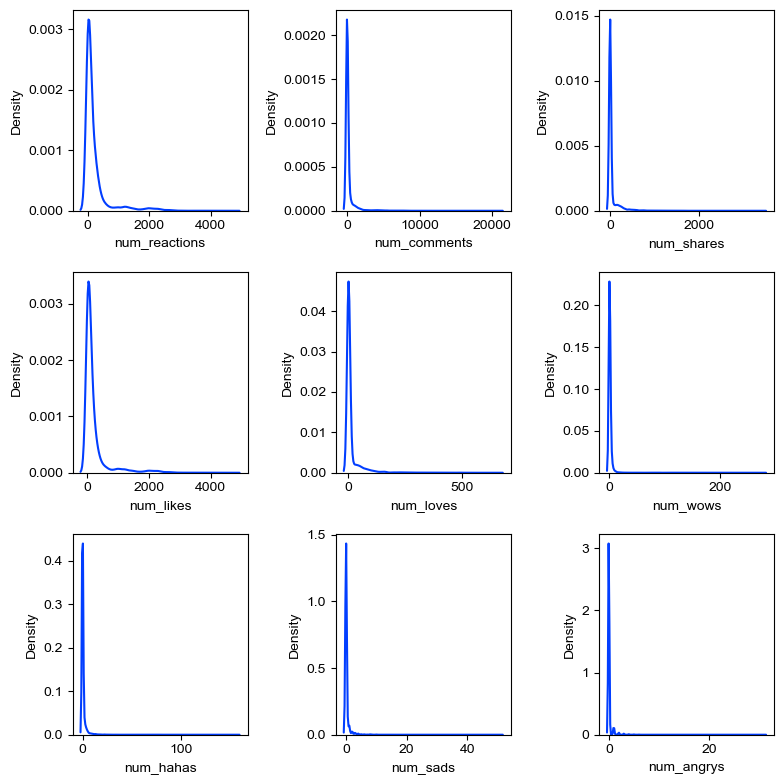

In [22]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(8, 8))
index = 0
sns.set_theme(style="darkgrid")

axs = axs.flatten()
for key, value in data_num.items():
    sns.kdeplot(x=key, data= data_num, ax=axs[index])
    index += 1
plt.tight_layout()

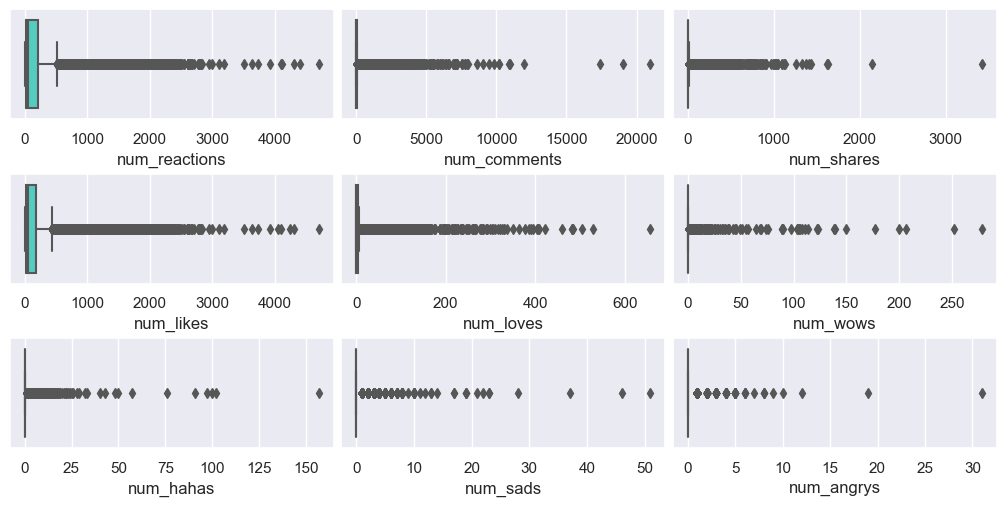

In [23]:
# Representamos gráficamente las distintas variables para ver su distribución, presencia / ausencia de outliers..

fig, axs = plt.subplots(ncols=3, nrows= 3, figsize=(10, 5))
index = 0
axs = axs.flatten()

for k,v in data_num.items():
    sns.boxplot(x=k, data=data_num, ax=axs[index],  color = 'turquoise')
    index += 1
plt.tight_layout(pad=0.4)


Podemos observar que **todas** las variables contienen **muchos outliers**.

Dado que las variables numéricas NO son Gaussianas, aplicaremos **Robust Scaler** puesto que todas contienen valores atípicos.  
En cuanto al las variables categóricas, aplicaremos la Codificación **One-Hot**.

In [24]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

# Copia de la BD para tener las transformaciones:
data_num_transf = data_num.copy()

col_RS = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

scaler = preprocessing.RobustScaler().fit(data_num_transf[col_RS])
data_num_transf[col_RS] = scaler.transform(data_num_transf[col_RS])
data_num_transf.head()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0


Una vez aplicado **el Robust Scaler** (las variables numéricas han sido escaladas mediante una tecnica que funciona mejor con outliers, puesto que es menos sensible a ellos), los datos están preparados para aplicar el **PCA (Análisis de Componente Principales)**
- Se importa la biblioteca necesaria para utilizar el PCA.  
- Se entrena el modelo PCA utilizando los datos preparados.  
- Se determina el número de componentes a los que se reducirán las dimensiones.  
Esto se hace para capturar la mayor cantidad de variabilidad en los datos con la menor cantidad de componentes posibles.

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(.95)
data_pca = pca.fit(data_num_transf)
pca.n_components_

2

El conjunto se reduce a 2 dimensiones. Asi se pueden representar la mayoria de los datos de manera bidimensional.

In [27]:
pca.explained_variance_ratio_

array([0.78433741, 0.17002508])

Obtenemos la ratio de la varianza, que explica cómo de bien se mantiene la información en ese nuevo espacio bidimensional

In [28]:
# Aplicamos PCA a 2 componentes:

pca = PCA(n_components=2)
pca.fit(data_num_transf)

# Fit y Tranform
data_num_transf_pca = pd.DataFrame(pca.transform(data_num_transf), columns=["Column_PCA_1", "Column_PCA_2"], index=data_num_transf.index)

# Resultado del dataframe una vez aplicado el PCA:
data_num_transf_pca.head()

,Column_PCA_1,Column_PCA_2
0,48.141927,39.279885
1,-14.873807,-2.241151
2,3.371249,3.438150
3,-14.877890,-2.247779
4,-14.268106,-1.394616


**Preprocesamiento Variables Categóricas**

In [29]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   post              6999 non-null   object
 1   profile           6999 non-null   object
 2   status_type       6999 non-null   object
 3   status_published  6999 non-null   object
dtypes: object(4)
memory usage: 273.4+ KB


In [30]:
data_cat.head()

,post,profile,status_type,status_published
0,1649696485147474,246675545449582,video,4/22/2018 6:00
1,1649426988507757,246675545449582,photo,4/21/2018 22:45
2,1648730588577397,246675545449582,video,4/21/2018 6:17
3,1648576705259452,246675545449582,photo,4/21/2018 2:29
4,1645700502213739,246675545449582,photo,4/18/2018 3:22


Preparamos 'status_published' para poder aplicar OneHotEncoder:

In [31]:
from datetime import datetime

years = []
for fecha_str in data_cat['status_published']:
    fecha_obj = datetime.strptime(fecha_str, "%m/%d/%Y %H:%M")
    year = fecha_obj.year
    years.append(year)
    
data_cat['status_published'] = years.copy()
data_cat.head()

,post,profile,status_type,status_published
0,1649696485147474,246675545449582,video,2018
1,1649426988507757,246675545449582,photo,2018
2,1648730588577397,246675545449582,video,2018
3,1648576705259452,246675545449582,photo,2018
4,1645700502213739,246675545449582,photo,2018


Descartamos las publicaciones como variable categórica a preprocesar, puesto que en realidad son cada uno de los registros únicos del dataframe.

In [32]:
data_cat.drop('post', axis = 1, inplace = True)
data_cat.head()

,profile,status_type,status_published
0,246675545449582,video,2018
1,246675545449582,photo,2018
2,246675545449582,video,2018
3,246675545449582,photo,2018
4,246675545449582,photo,2018


In [33]:
data_cat['status_published'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012])

In [34]:
status_published_N = []

def convertir(num):
    if num == 2012:
        return 'Doce'
    elif num == 2013:
        return 'Trece'
    elif num == 2014:
        return 'Catorce'
    elif num == 2015:
        return 'Quince'
    elif num == 2016:
        return 'Dieciseis'
    elif num == 2017:
        return 'Diecisiete'
    else:
        return 'Dieciocho'

status_published_N = data_cat['status_published'].apply(convertir)
data_cat['status_published'] = status_published_N.copy()

data_cat.head()

,profile,status_type,status_published
0,246675545449582,video,Dieciocho
1,246675545449582,photo,Dieciocho
2,246675545449582,video,Dieciocho
3,246675545449582,photo,Dieciocho
4,246675545449582,photo,Dieciocho


In [35]:
# Aplicamos One Hot Encoder 

data_cat_transf = pd.get_dummies(data = data_cat)
data_cat_transf.head()

,profile_1050855161656896,profile_117059915488335,profile_134115277150304,profile_146481362756646,profile_246675545449582,profile_614855718638584,profile_725980084255106,profile_819700534875473,profile_848451358648417,status_type_link,status_type_photo,status_type_status,status_type_video,status_published_Catorce,status_published_Dieciocho,status_published_Dieciseis,status_published_Diecisiete,status_published_Doce,status_published_Quince,status_published_Trece
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [36]:
data_transf = pd.concat([data_num_transf_pca, data_cat_transf], axis = 1)
data_transf.head()

,Column_PCA_1,Column_PCA_2,profile_1050855161656896,profile_117059915488335,profile_134115277150304,profile_146481362756646,profile_246675545449582,profile_614855718638584,profile_725980084255106,profile_819700534875473,...,status_type_photo,status_type_status,status_type_video,status_published_Catorce,status_published_Dieciocho,status_published_Dieciseis,status_published_Diecisiete,status_published_Doce,status_published_Quince,status_published_Trece
0,48.141927,39.279885,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,-14.873807,-2.241151,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,3.371249,3.438150,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,-14.877890,-2.247779,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,-14.268106,-1.394616,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


**Aplicamos modelo K-Means**

El algoritmo K-Means divide un conjunto de datos en Klusters basándose en sus similitudes.  
Cada grupo tiene un punto medio (Centroide) y los datos se van asignando al grupo cuyo centroide está más cerca.  
  
Los primeros centroides son seleccionados al azar y cada punto se asigna basándose en la distancia euclidiana.  
Recalcula los centroides de cada clúster, tomando el promedio de todos los puntos que pertenecen a ese clúster.  
Se repite el proceso hasta que los centroides ya no cambien significativamente o se alcance un número máximo de iteraciones.  
  
**El resultado del algoritmo K-Means es un conjunto de K clústeres, donde los puntos dentro de cada clúster son más similares entre sí en comparación con los puntos de otros clústeres.**

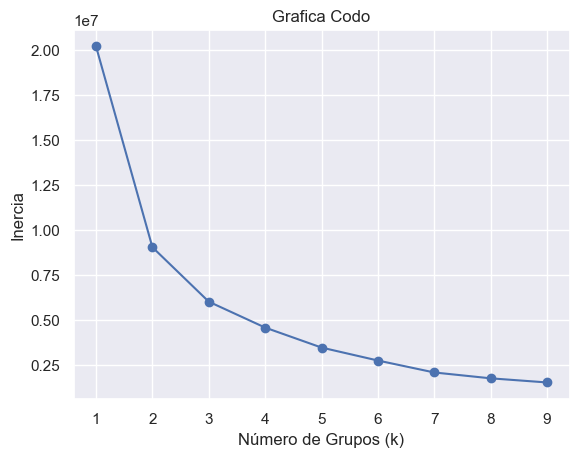

In [37]:
from sklearn.cluster import KMeans

k_values = range(1, 10)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_transf)  
    inertias.append(kmeans.inertia_)
    
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Número de Grupos (k)')
plt.ylabel('Inercia')
plt.title('Grafica Codo')
plt.show()


La gráfica de Codo sirve para averiguar el número de grupos adecuados para el modelo K-Means.  
El cambio de dirección en la gráfica (codo) sugiere dos o tres. Como no está demasiado claro, confirmamos mediante **KneeLocator**.

In [38]:
from kneed import KneeLocator
knee = KneeLocator(range(1, 10), inertias, curve='convex', direction='decreasing')

print("Número óptimo de grupos:", knee.elbow)

Número óptimo de grupos: 3


In [39]:
# Confirmado el num. de grupos en 3:

km = KMeans(n_clusters=3, random_state=7)
km.fit(data_transf)

KMeans(n_clusters=3, random_state=7)

Una vez confirmados el número de grupos, entrenamos el modelo y obtenemos los centroides de cada cluster.

In [40]:
y_predicted = km.predict(data_transf)
y_predicted

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [41]:
centroids = km.cluster_centers_
centroids

array([[-1.11041455e+01, -1.20779326e+00,  9.93490391e-02,
         8.52448853e-03,  1.77774334e-01,  1.54990701e-02,
         4.07005580e-01,  1.90328580e-01,  2.49535028e-02,
         7.90452573e-03,  6.86608803e-02,  9.76441414e-03,
         6.57315561e-01,  5.56416615e-02,  2.77278363e-01,
         3.61128332e-02,  3.38499690e-01,  9.03595784e-02,
         3.14011159e-01,  9.12895226e-02,  5.22318661e-02,
         7.74953503e-02],
       [ 3.35027131e+02, -5.69672338e+01,  4.72222222e-01,
         5.20417043e-18,  1.25000000e-01,  2.91666667e-01,
         5.55555556e-02,  5.55111512e-17,  5.55555556e-02,
        -4.33680869e-18,  4.16333634e-17, -3.46944695e-18,
         1.38888889e-02,  1.38777878e-17,  9.86111111e-01,
        -6.93889390e-18,  4.86111111e-01,  4.16666667e-02,
         4.72222222e-01,  2.77555756e-17, -1.38777878e-17,
        -2.77555756e-17],
       [ 1.00046302e+02,  2.50406799e+01,  2.16842105e-01,
         2.10526316e-03,  1.17894737e-01,  8.42105263e-03,
    

In [42]:
data_transf['cluster_km'] = y_predicted
data_transf.head()

,Column_PCA_1,Column_PCA_2,profile_1050855161656896,profile_117059915488335,profile_134115277150304,profile_146481362756646,profile_246675545449582,profile_614855718638584,profile_725980084255106,profile_819700534875473,...,status_type_status,status_type_video,status_published_Catorce,status_published_Dieciocho,status_published_Dieciseis,status_published_Diecisiete,status_published_Doce,status_published_Quince,status_published_Trece,cluster_km
0,48.141927,39.279885,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,2
1,-14.873807,-2.241151,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3.371249,3.438150,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,-14.877890,-2.247779,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,-14.268106,-1.394616,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Añadimos una columna al dataset, con las predicciones del modelo K-Means

In [43]:
data_transf['cluster_km'].value_counts()

0    6452
2     475
1      72
Name: cluster_km, dtype: int64

**Representación Gráfica de los respectivos segmentos generados por el modelo:**

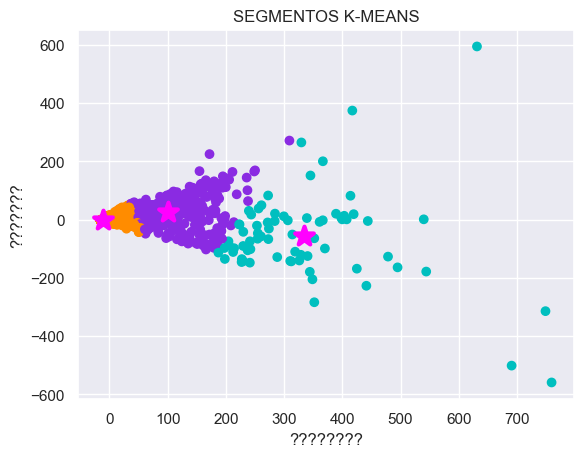

In [44]:
from matplotlib.colors import ListedColormap

cmap_colors = ListedColormap(['#FF8C00', '#00BFBF', '#8A2BE2'])

plt.scatter(data_transf.iloc[:, 0], data_transf.iloc[:, 1], c=y_predicted, cmap=cmap_colors)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, linewidths=3, color='#FF00FF')

plt.xlabel('????????')
plt.ylabel('???????')
plt.title('SEGMENTOS K-MEANS')
plt.show()


**Exercici 2**  
  
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [45]:
import scipy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

Representamos gráficamente la estructura de la agrupación de los datos mediante un dendograma.  
**Dendograma**: Es un diagrama de arbol que muestra la jerarquía de los grupos que se forman en base a su distancia.

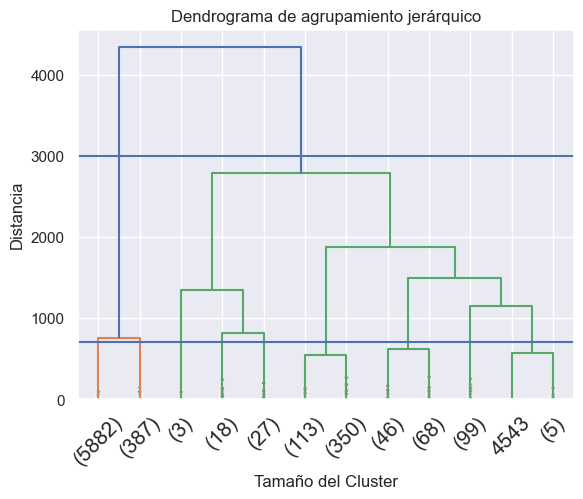

In [46]:
Z = linkage(data_transf, 'ward')
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Dendrograma de agrupamiento jerárquico')
plt.xlabel('Tamaño del Cluster')
plt.ylabel('Distancia')

plt.axhline(y=3000)
plt.axhline(y=700)

plt.show()

Las fusiones de clusters se muestran como uniones de ramas en el dendrograma:  
- **Distancia horizontal**: Las distancias horizontales entre las fusiones de clusters indican la distancia o diferencia entre ellos. Cuanto mayor sea la distancia horizontal, mayor es la difeencia entre los clusters fusionados. 
- **La altura de cada fusión** indica la distancia o diferencia entre los clusters fusionados. Las fusiones que ocurren a una mayor altura indican una mayor diferencia entre los clusters.  
- **Líneas horizontales**: En el dendrograma, se pueden agregar líneas horizontales para ayudar a determinar el número adecuado de clusters. Estas líneas pueden representar umbrales de distancia o disimilitud. En este caso, se han trazado dos líneas horizontales en los valores de distancia 3000 y 700.   
- **Ramas contraídas**: El parámetro truncate_mode se establece en 'lastp' para contraer las ramas del dendrograma cuando se alcanza un cierto número de clusters. En este caso, se ha establecido en 12, lo que significa que las ramas que resultan en 12 clusters se contraen para facilitar la visualización.  


**Clustering jerárquico aglomerativo**: Agrupa los datos a partir de la proximidad entre ellos.  
Este método comienza considerando cada punto de los datos como un cluster individual y, a continuación, va fusionando iterativamente los clusters más cercanos hasta obtener un único cluster que contiene todos los datos.

In [47]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward')
Hclustering.fit(data_transf)
cluster_Hyer = Hclustering.labels_
cluster_Hyer

array([0, 1, 1, ..., 1, 1, 1])

In [48]:
data_transf['cluster_Hyer'] = cluster_Hyer
data_transf.head()

,Column_PCA_1,Column_PCA_2,profile_1050855161656896,profile_117059915488335,profile_134115277150304,profile_146481362756646,profile_246675545449582,profile_614855718638584,profile_725980084255106,profile_819700534875473,...,status_type_video,status_published_Catorce,status_published_Dieciocho,status_published_Dieciseis,status_published_Diecisiete,status_published_Doce,status_published_Quince,status_published_Trece,cluster_km,cluster_Hyer
0,48.141927,39.279885,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,2,0
1,-14.873807,-2.241151,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,3.371249,3.438150,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,-14.877890,-2.247779,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,-14.268106,-1.394616,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [49]:
data_transf['cluster_Hyer'].value_counts()

1    6269
0     730
Name: cluster_Hyer, dtype: int64

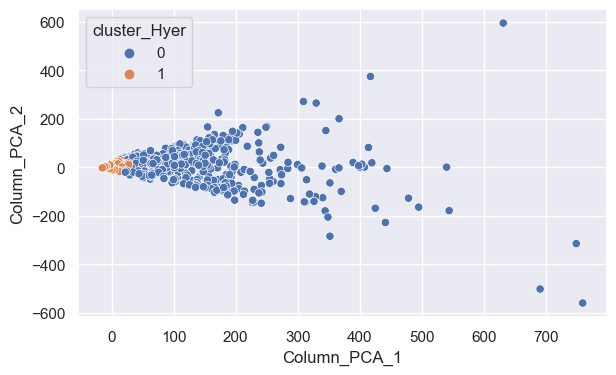

In [50]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Column_PCA_1', y='Column_PCA_2', data=data_transf, hue='cluster_Hyer')

plt.show()


In [51]:
data_num['cluster'] = cluster_Hyer
data_num.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,529.0,512.0,262.0,432.0,92.0,3.0,1.0,1.0,0.0,0
1,150.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,1
2,227.0,236.0,57.0,204.0,21.0,1.0,1.0,0.0,0.0,1
3,111.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,1
4,213.0,0.0,0.0,204.0,9.0,0.0,0.0,0.0,0.0,1


Añadimos al dataframe original, la variable del cluster para poder visualizar gráficamente con las variables originales:  
- El primer grupo es del de las variables núméricas.
- Els segundo grupo es el de las variables categóricas.

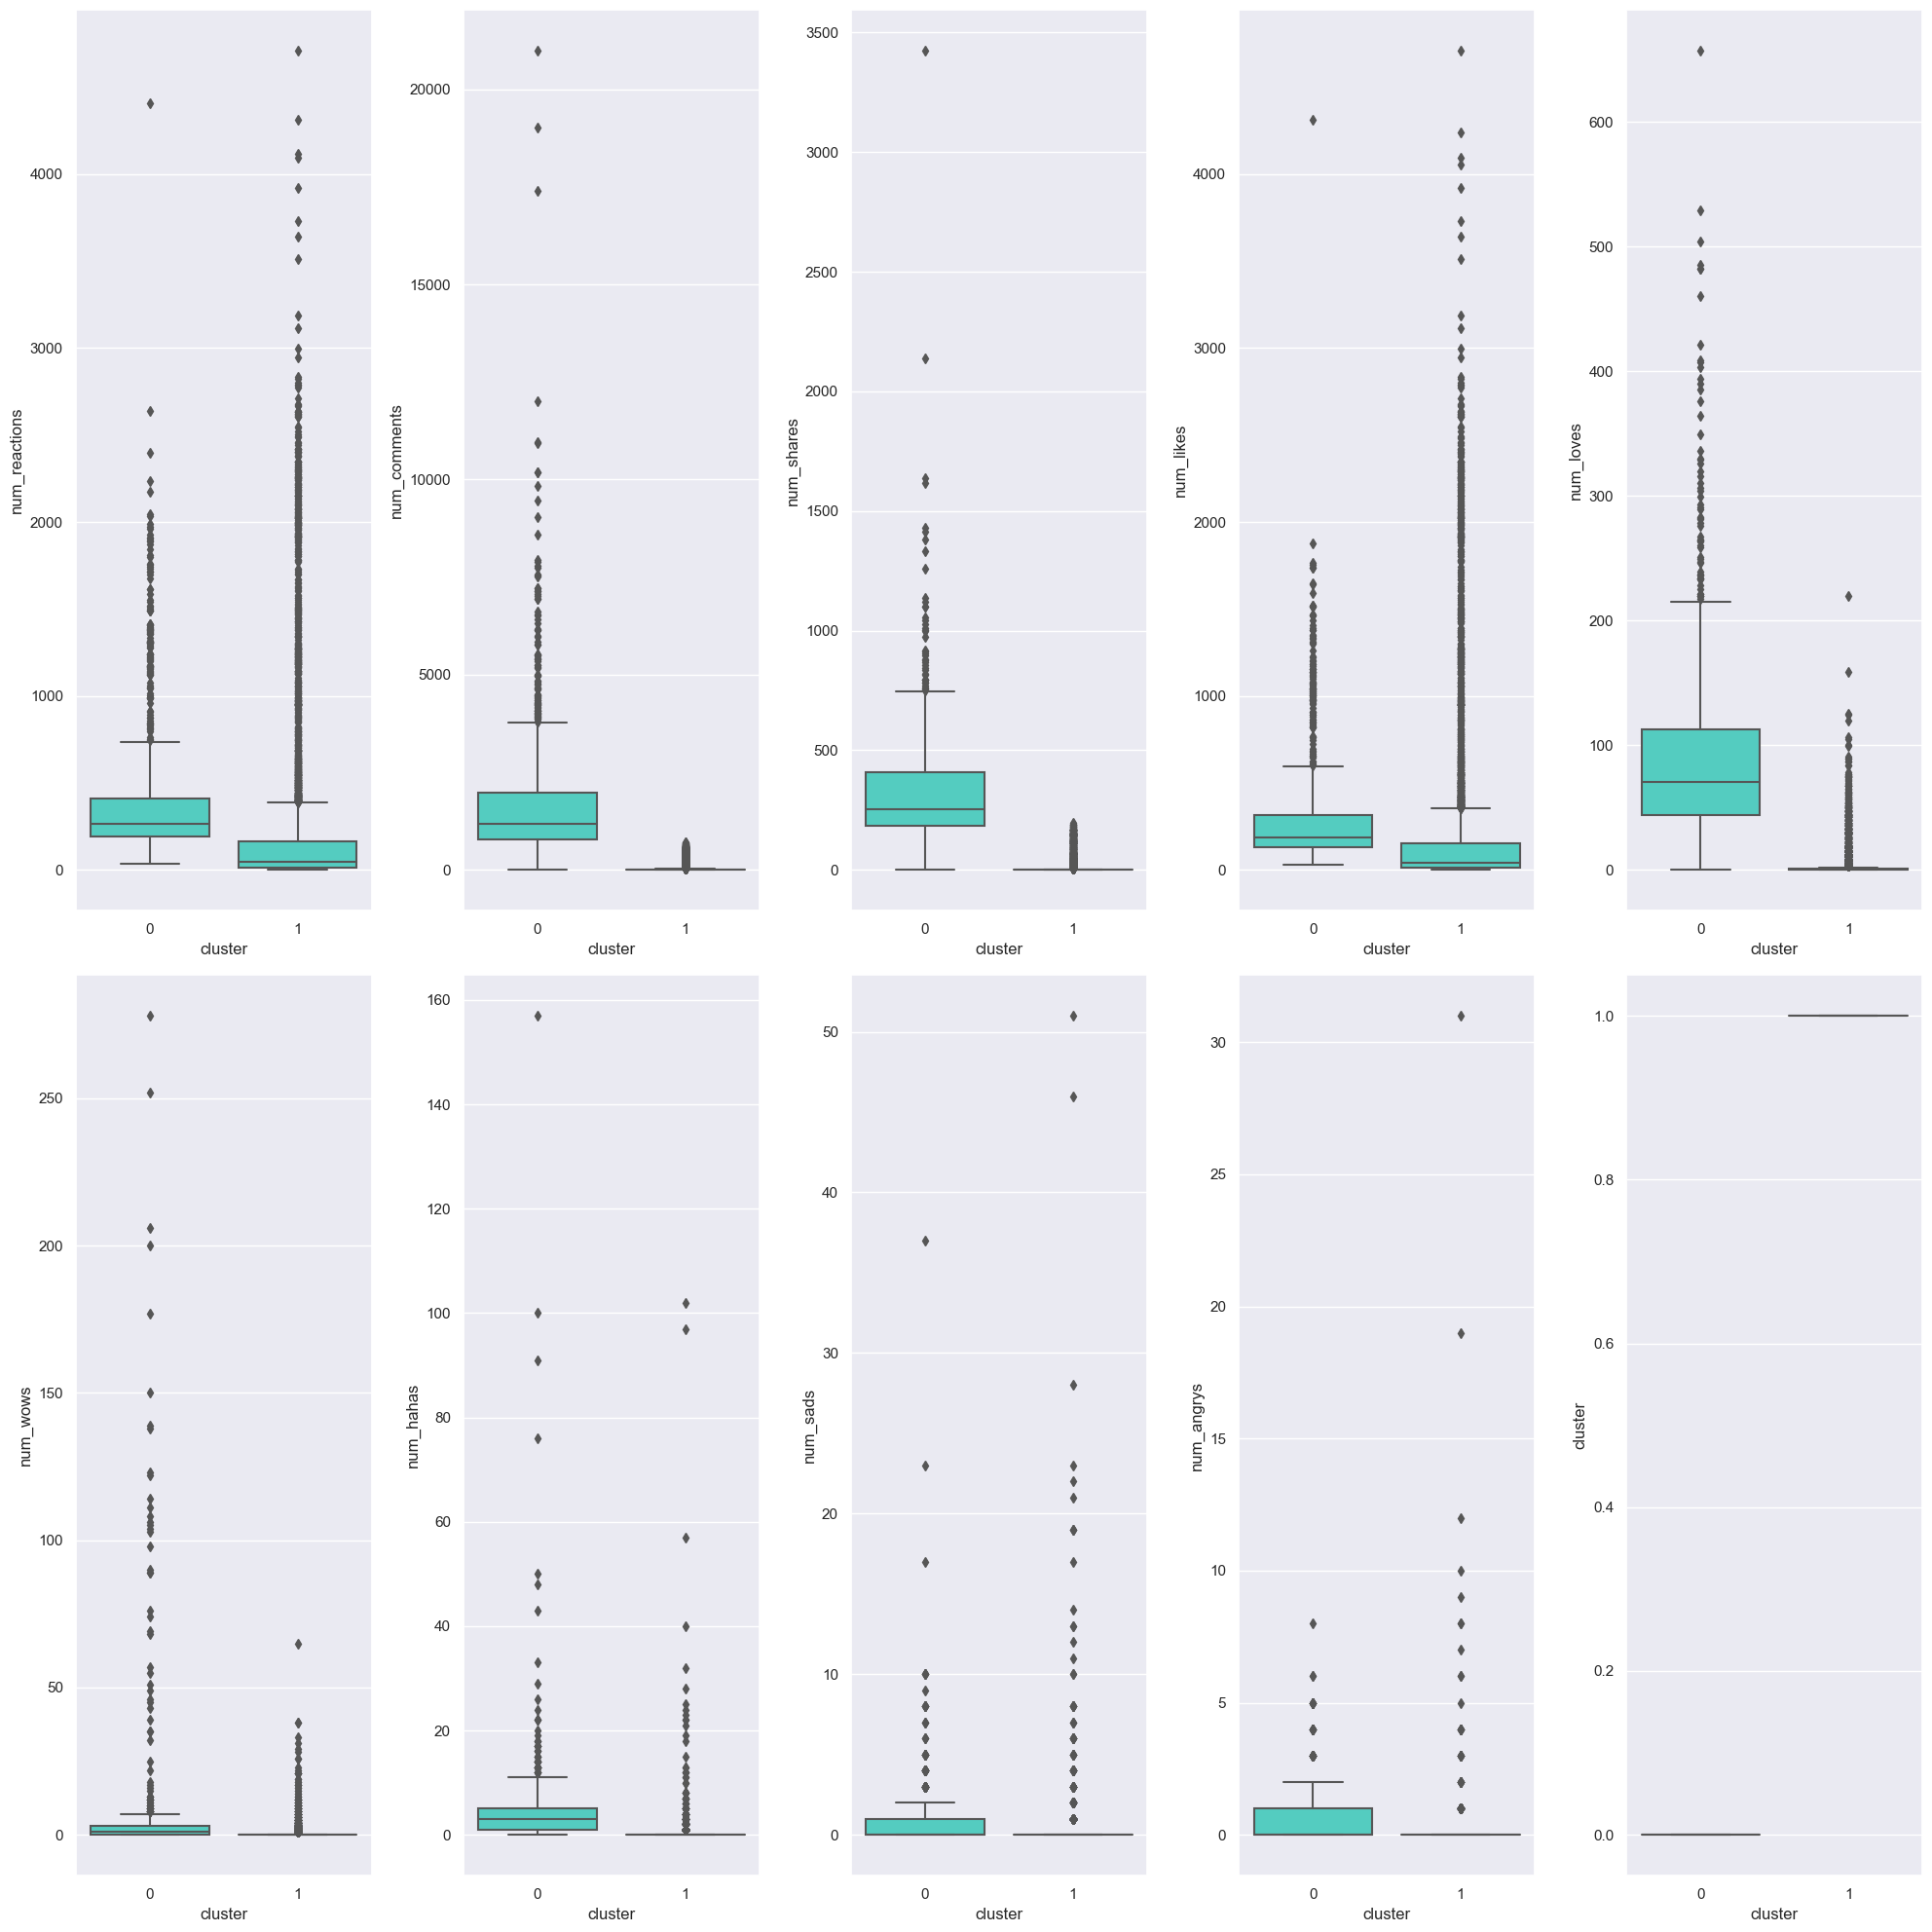

In [52]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 20))
index = 0
axs = axs.flatten()
for key, value in data_num.items():
    sns.boxplot(x = data_num["cluster"], y=key, data=data_num, ax=axs[index], color = 'turquoise')
    index += 1
plt.tight_layout()


Podemos ver que el grupo 0 tiene más reacciones que el 1, pero existen muchos más outliers que en el 0. Estas reacciones se producen por el numero de likes, donde están más igualados.  
A la hora de mirar individualmente el resto de reacciones, se ve la desproporción: La mayoría pertenecen al grupo 0 (comments, shares, loves, angrys..)

In [53]:
data_cat['cluster'] = cluster_Hyer
data_cat.head()

,profile,status_type,status_published,cluster
0,246675545449582,video,Dieciocho,0
1,246675545449582,photo,Dieciocho,1
2,246675545449582,video,Dieciocho,1
3,246675545449582,photo,Dieciocho,1
4,246675545449582,photo,Dieciocho,1


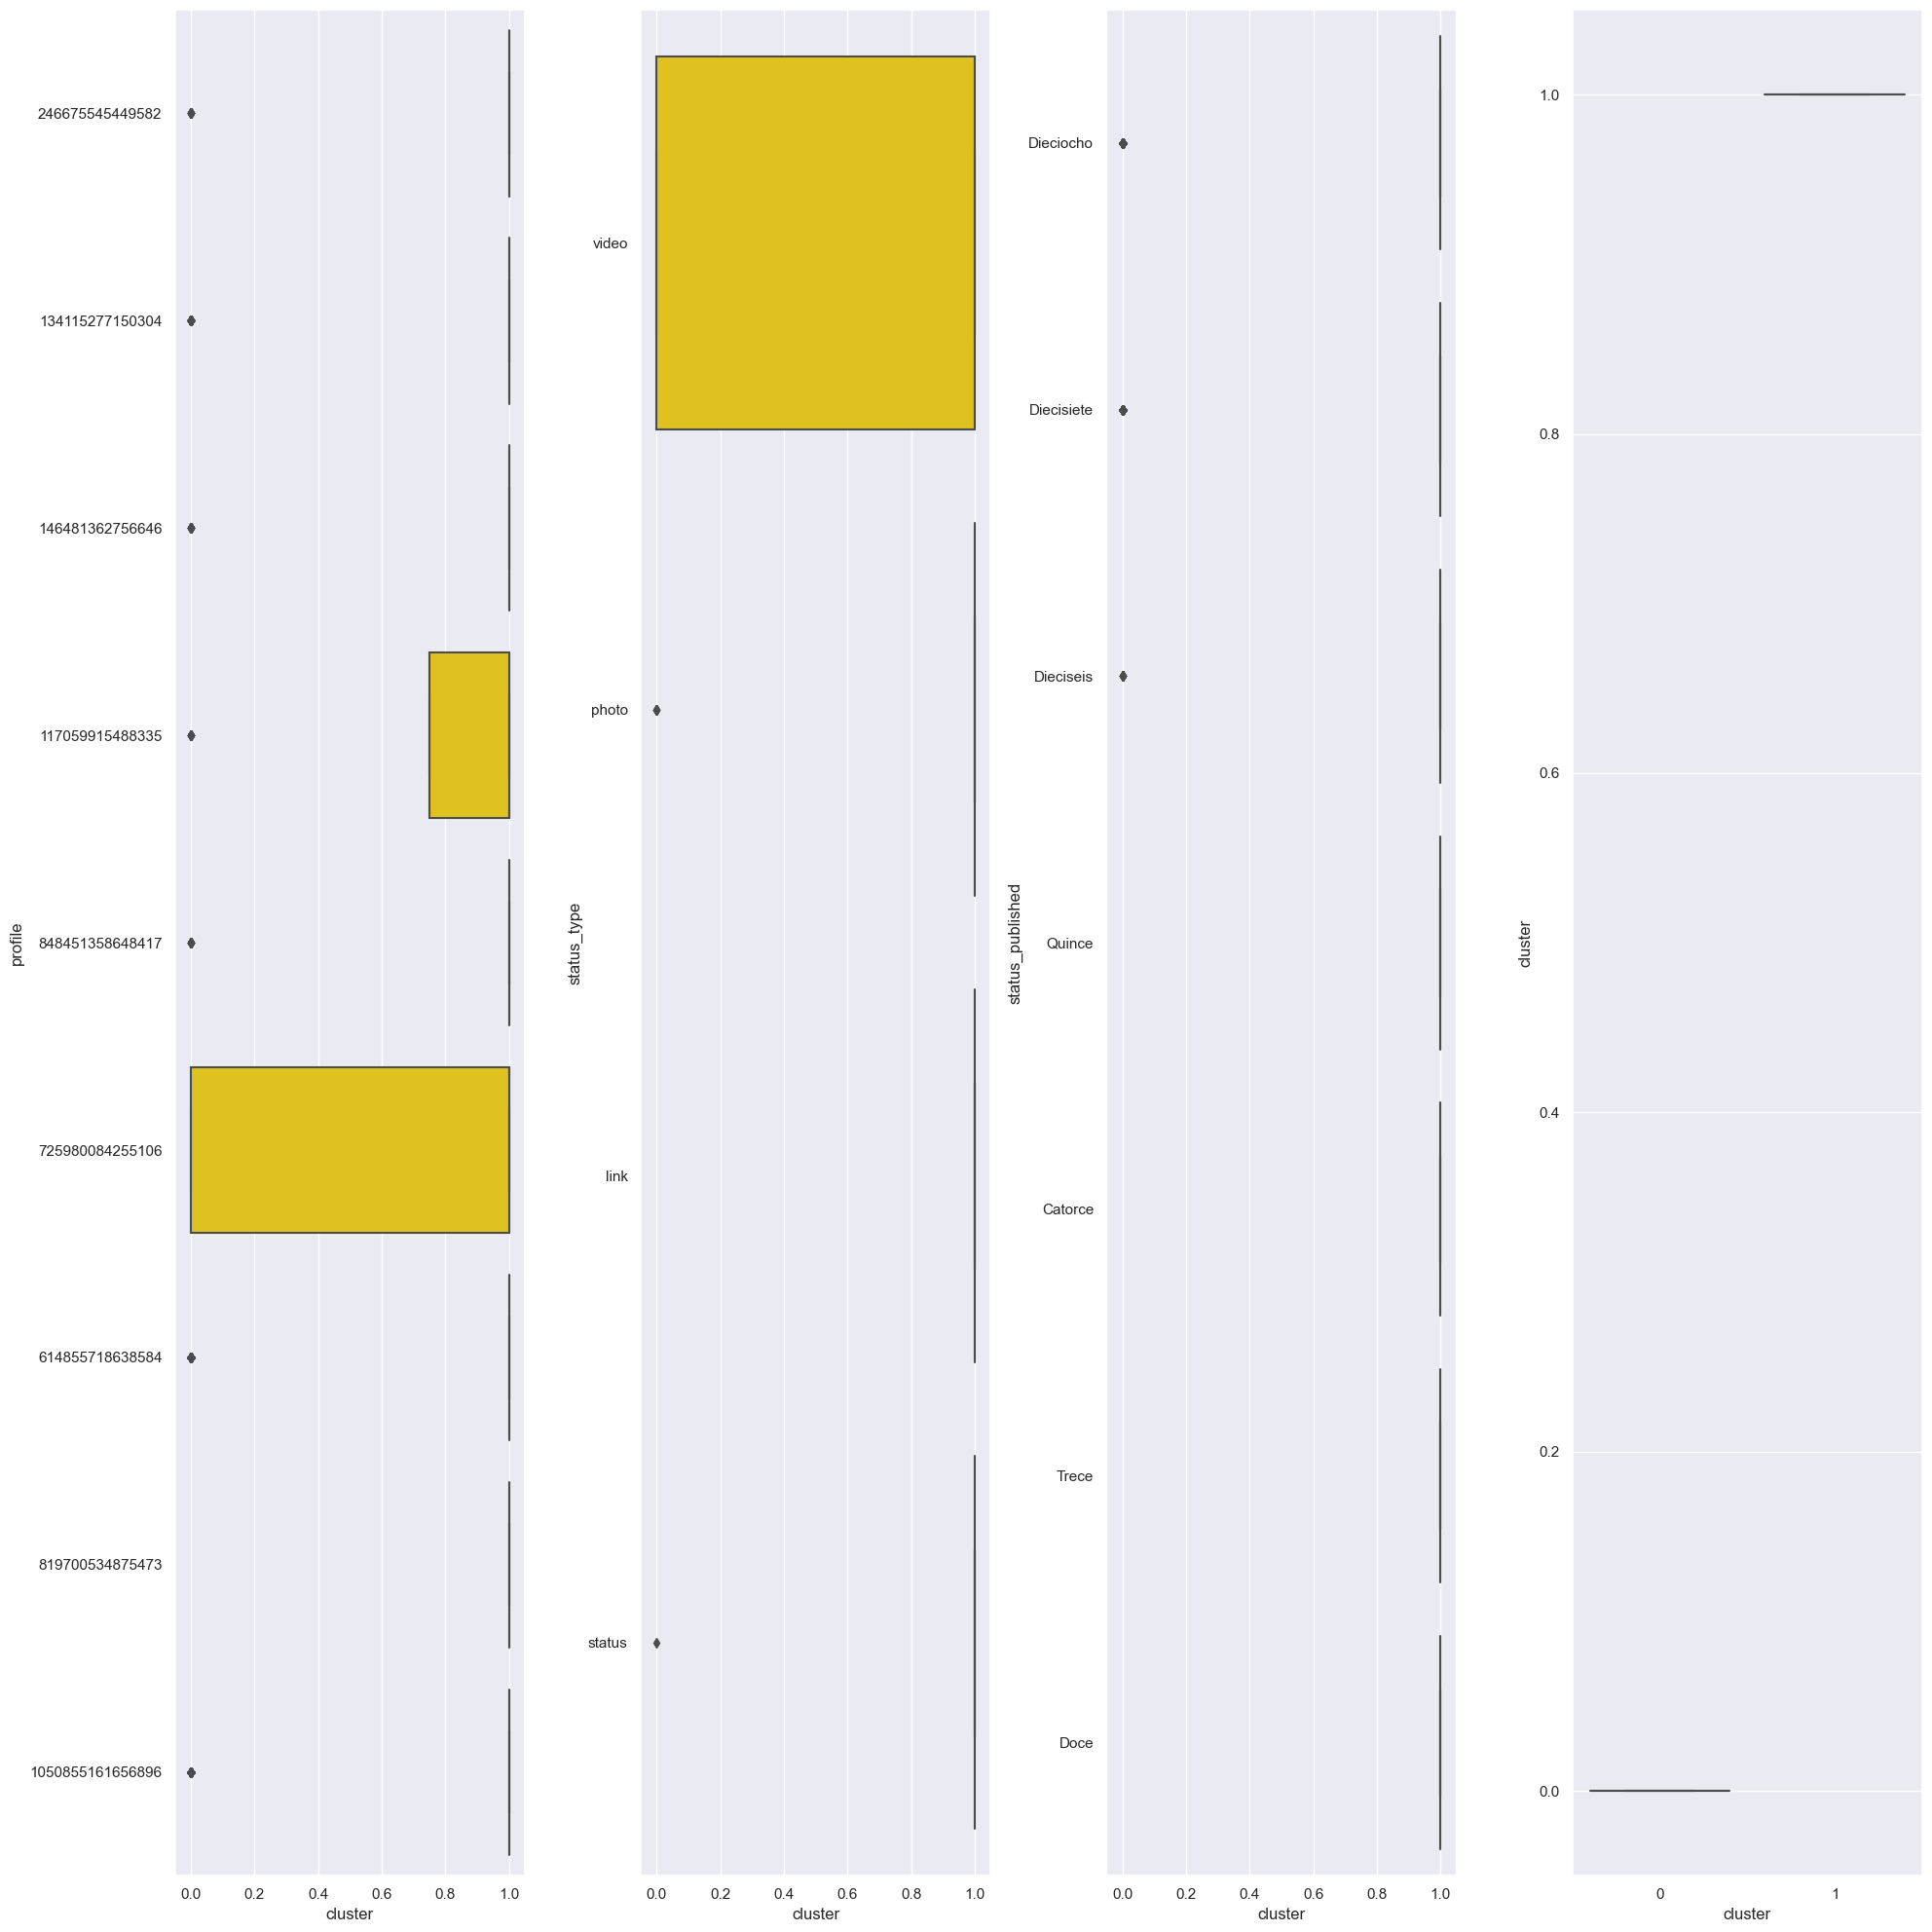

In [54]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 20))
index = 0
axs = axs.flatten()
for key, value in data_cat.items():
    sns.boxplot(x = data_cat["cluster"], y=key, data=data_cat, ax=axs[index], color = 'gold')
    index += 1
plt.tight_layout()


En este caso vemos que la mayoría de las variables pertenecen al grupo 1, aunque siempre existen outliers en el 0 (conviene recordar aquí que desde el principio de la observación del dataframe ya se vió que todas las variables contienen bastantes ouliers).  
Existen algunas encepciones donde podemos ver que los valores se dividen entre los dos grupos, com en el caso del video o el profile_725980084255106..

**Exercici 3**  
  
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [55]:
from sklearn.metrics import silhouette_score

# Calculem el rendiment amb silhouette scores per cada algoritme
kmeans_silhouette = silhouette_score(data_transf, y_predicted)
jerarq_silhouette = silhouette_score(data_transf, cluster_Hyer)

print("Rendimiento Kmeans: {:.2f}%".format(kmeans_silhouette))
print("Rendimiento Jerarquico: {:.2f}%".format(jerarq_silhouette))

Rendimiento Kmeans: 0.87%
Rendimiento Jerarquico: 0.85%


El resultado es que el rendimiento del **K-Means**, resulta algo mejor que el Jerárquico.  